# Assignment 3: Data Science and Big Data Analysis (COSC 5340)

#                           Richard Johnson L20455045 


"Airfoil Self-Noise Data Set"

Data Set Information:
    
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.



Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs (Nominal attribute)
2. Angle of attack, in degrees (Nominal attribute)
3. Chord length, in meters (Nominal attribute)
4. Free-stream velocity, in meters per second (Nominal attribute)
5. Suction side displacement thickness, in meters (Nominal attribute)
The only output is:
6. Scaled sound pressure level, in decibels (Nominal attribute)


In [121]:
#Load necessary libraries
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

%matplotlib inline

In [26]:
#Load dataset
df = pd.read_csv("airfoil_self_noise.dat", delim_whitespace=True, header=None)

In [27]:
#Check top5 data
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [28]:
#Setting the columns name from our dataset file

df.columns = ['frequency','aoa','chord_length','velocity','displacement','SPL']

In [29]:
#Data Information check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   aoa           1503 non-null   float64
 2   chord_length  1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   displacement  1503 non-null   float64
 5   SPL           1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [30]:
#Check for null value
df.isnull().sum()

frequency       0
aoa             0
chord_length    0
velocity        0
displacement    0
SPL             0
dtype: int64

In [31]:
df.head()

,frequency,aoa,chord_length,velocity,displacement,SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [32]:
df_norm = df.apply(lambda x: (x - x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)))

In [33]:
df_norm.head()

,frequency,aoa,chord_length,velocity,displacement,SPL
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [34]:
df_norm.to_csv("df_norm.csv", index=False, header=True)

# Perform K-Means Analysis

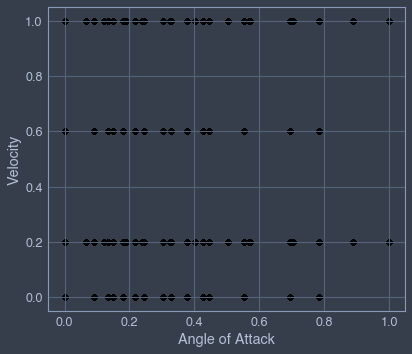

In [115]:
X = df_norm[["aoa","velocity"]]
#Visualise data points
plt.scatter(X["aoa"],X["velocity"],c='black')
plt.xlabel('Angle of Attack')
plt.ylabel('Velocity')
plt.show()

# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

In [85]:
#number of clusters
K=5

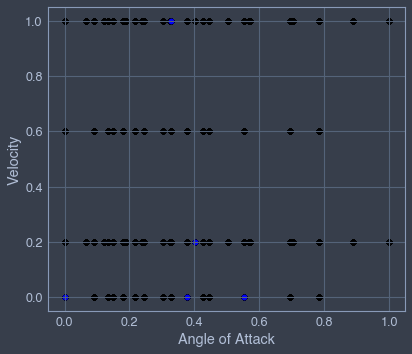

In [86]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["aoa"],X["velocity"],c='Black')
plt.scatter(Centroids["aoa"],Centroids["velocity"],c='Blue')
plt.xlabel('Angle of Attack')
plt.ylabel('Velocity')
plt.show()

0.15796844711291608
0.08158066681278706
0.110626727683679
0.16182021808424796
0.29632468812122326
0.12500301158665106
0.02748122957535515
-0.004261497863078917
-0.02016773140448916
-0.011739135969543485
0.0


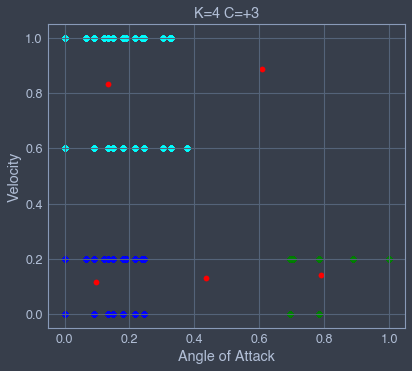

In [87]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["aoa"]-row_d["aoa"])**2
            d2=(row_c["velocity"]-row_d["velocity"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["velocity","aoa"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['velocity'] - Centroids['velocity']).sum() + (Centroids_new['aoa'] - Centroids['aoa']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["velocity","aoa"]]
    
color=['blue','green','cyan','yellow','black']
for k in range(K):
    data=X[X["Cluster"]==k+3]
    plt.scatter(data["aoa"],data["velocity"],c=color[k])
plt.scatter(Centroids["aoa"],Centroids["velocity"],c='red')
plt.title('K=4 C=+3')
plt.xlabel('Angle of Attack')
plt.ylabel('Velocity')
plt.savefig('kmeans9.png', dpi=400)
plt.show()

In [146]:
#For DBSCAN with eps=0.05 and minimum sample=5
db = DBSCAN(eps=0.05, min_samples=2).fit(X)
#array1 = np.zeros((len(data),len(data)))
airfoil = np.zeros((len(X),len(X)))
#[db.velocity] = True
cluster = db.labels_
#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points(black): %d' % n_noise_)


Estimated number of clusters: 30
Estimated number of noise points(black): 1322


In [132]:
model = DBSCAN(eps=0.5, min_samples=5).fit(dbscan_data)
model

DBSCAN()

In [140]:
outliers_df = df[model.labels_ == -1]
clusters_df = df[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'


clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

TypeError: 'list' object is not callable

In [141]:
model.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [133]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)
cluster = clustering.labels_
clustering

DBSCAN()

In [113]:
len(set(cluster))

31

In [118]:
def show_clusters(X, cluster):
        df = db(dict(x=X[:,0], y=X[:,1], label=cluster))
        colors = {-1: 'red', 0:'blue', 1:'orange', 2:'green', 3:'purple'}
        fig, ax = plt.subplots(figsize=(8, 8))
        grouped = db.groupby('label')
        for key, group in grouped:
                group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
        plt.xlabel('X_1')
        plt.ylabel('X_2')
        plt.show()

In [119]:
show_clusters(X, cluster)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [120]:
#Black removed and used for noise instead.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
#Black used for noise.
        col = [0, 0, 0, 1]

    aoa = (labels == k)

    xy = df_norm[aoa & velocity]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_norm[aoa & ~velocity]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN (Estimated Number Of Clusters: %d)' % n_clusters_)
plt.show()
"""
#For DBSCAN with eps=0.04 and minimum sample=4
db = DBSCAN(eps=0.04, min_samples=4).fit(Xfinal)
velocity = np.zeros_like(db.labels_, dtype=bool)
#velocity[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    aoa = (labels == k)
    xy = Xfinal[aoa & velocity]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = df_norm[aoa & ~velocity]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN (Estimated Number Of Clusters: %d)' % n_clusters_)
plt.show()
"""

NameError: name 'velocity' is not defined